In [9]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from concurrent import futures
import numpy as np
from scipy.stats import gaussian_kde
import pandas_datareader.data as web
data_dir = "./data/most_attractive_stocks"
os.makedirs(data_dir, exist_ok=True)

### List of SP500 companies

In [10]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_df = tables[0]
second_table = tables[1]
print(sp500_df.shape)
# rename symbol to escape symbol error
sp500_df["Symbol"] = sp500_df["Symbol"].map(lambda x: x.replace(".", "-"))  
sp500_df.to_csv("./data/SP500.csv", index=False)
sp500_df = pd.read_csv("./data/SP500.csv")
print(sp500_df.shape)
sp500_tickers = list(sp500_df["Symbol"])
sp500_df.head()

(503, 8)
(503, 8)


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [11]:
# def download_stock(stock):
#     try:
#         print(stock)
#         stock_df = web.DataReader(stock, 'yahoo', start_time, end_time)
#         stock_df['Name'] = stock
#         output_name = f"{data_dir}/{stock}.csv"
#         stock_df.to_csv(output_name)
#     except BaseException:
#         bad_names.append(stock)
#         print('bad: %s' % (stock))
# """ set the download window """
# start_time = dt.datetime(1900, 1, 1)
# end_time = dt.datetime(2022, 6, 15)
# bad_names = []  # to keep track of failed queries
# #set the maximum thread number
# max_workers = 20
# now = dt.datetime.now()
# path_failed_queries = f'{data_dir}/failed_queries.txt'
# if os.path.exists(path_failed_queries):
#     with open(path_failed_queries) as f:
#         failed_queries = f.read().split("\n")[:-1]
#         sp500_tickers_ = failed_queries
# else:
#     sp500_tickers_ = sp500_tickers
# print("number of stocks to download:", len(sp500_tickers_))
# # in case a smaller number of stocks than threads was passed in
# workers = min(max_workers, len(sp500_tickers_))
# with futures.ThreadPoolExecutor(workers) as executor:
#     res = executor.map(download_stock, sp500_tickers_)
# """ Save failed queries to a text file to retry """
# if len(bad_names) > 0:
#     with open(path_failed_queries, 'w') as outfile:
#         for name in bad_names:
#             outfile.write(name + '\n')
# finish_time = dt.datetime.now()
# duration = finish_time - now
# minutes, seconds = divmod(duration.seconds, 60)
# print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
# print(f"{len(bad_names)} stocks failed: ", bad_names)

number of stocks to download: 503
ABBV
AAP
A
GOOGL
ARE
ALLE
ALGN
ACN
ADBEATVI

GOOG
ALB
ADP
AOS
AAL
AEE
ALK
AFL
APD
AKAM
bad: AEE
AES
bad: ABBV
ALL
bad: AAP
AMCR
bad: AAL
LNT
bad: ALLE
ADM
bad: ACN
AWK
bad: AKAM
ABT
bad: ALB
AEP
bad: A
AMZN
bad: GOOGL
AMD
bad: ALK
AMP
bad: ADBE
AXP
bad: ALGN
ABC
bad: AFL
ACGL
bad: APD
MMM
bad: ATVI
AON
bad: ARE
AMT
bad: ADP
ANSS
bad: AOS
APA
bad: ALL
MO
bad: AMCR
APTV
bad: ADM
AME
bad: ABT
ANET
bad: GOOG
AJG
bad: AMP
AIG
bad: AES
AZO
bad: AWK
AIZ
bad: LNT
T
bad: ACGL
BKR
bad: AMZN
ADI
bad: AMD
APH
bad: ANET
ADSK
bad: ABC
AMGN
bad: AMT
AAPL
bad: APTV
ATO
bad: AXP
BAC
bad: AME
AVB
bad: AON
BKNG
bad: ANSS
AVY
bad: AEP
BBY
bad: AIG
AMAT
bad: AIZ
BR
bad: AZO
BXP
bad: MMM
AVGO
bad: ADSK
BIIB
bad: APA
BIO
bad: AJG
BG
bad: APH
BAX
bad: MO
BLK
bad: AVB
BRK-B
bad: T
BDX
bad: BKR
TECH
bad: ADI
BBWI
bad: BBY
CZR
bad: AMGN
BSX
bad: AVGO
CHRW
bad: BR
BALL
bad: ATO
BK
bad: AAPL
CARR
bad: BXP
KMX
bad: BKNG
COF
bad: BAX
WRB
bad: AVY
BWA
bad: CHRW
CPT
bad: BSX
BA
bad: B

In [16]:
import yfinance as yf
# import pandas_datareader.data as web

data_dir = "./data/post_FAANG_market"
os.makedirs(data_dir, exist_ok=True)

today_str = "2022-12-27"
today = dt.datetime.strptime(today_str, "%Y-%m-%d")

def download_stock(stock):
    try:
        print(stock)
        # stock_df = web.DataReader(stock, 'yahoo', start_time, end_time)
        stock_df = yf.Ticker(stock).history(start=start_time, end=end_time)
        stock_df['Name'] = stock
        output_name = f"{data_dir}/{stock}.csv"
        stock_df.to_csv(output_name)
    except BaseException:
        bad_names.append(stock)
        print('bad: %s' % (stock))


""" set the download window """
start_time = dt.datetime(1900, 1, 1)
end_time = dt.datetime.today()
end_time = dt.datetime.strftime(end_time, "%Y-%m-%d")
bad_names = []  # to keep track of failed queries
#set the maximum thread number
max_workers = 20
now = dt.datetime.now()
path_failed_queries = f'{data_dir}/failed_queries.txt'
if os.path.exists(path_failed_queries):
    with open(path_failed_queries) as f:
        failed_queries = f.read().split("\n")[:-1]
        sp500_tickers_ = failed_queries
else:
    sp500_tickers_ = sp500_tickers
print("number of stocks to download:", len(sp500_tickers_))

# in case a smaller number of stocks than threads was passed in
workers = min(max_workers, len(sp500_tickers_))
with futures.ThreadPoolExecutor(workers) as executor:
    res = executor.map(download_stock, sp500_tickers_)
""" Save failed queries to a text file to retry """
if len(bad_names) > 0:
    with open(path_failed_queries, 'w') as outfile:
        for name in bad_names:
            outfile.write(name + '\n')
finish_time = dt.datetime.now()
duration = finish_time - now
minutes, seconds = divmod(duration.seconds, 60)
print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
print(f"{len(bad_names)} stocks failed: ", bad_names)

number of stocks to download: 503
MMM
AOS
ABT
ABBV
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AMEAMGN

APH
ADI
ANSS
AON
APA
AAPL
AMAT
APTV
ACGL
ANETAJG

AIZ
T
ATO
ADSK
AZO
AVBAVY

BKR
BALL
BAC
BBWI
BAX
BDX
WRB
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
BG
CHRW
CDNS
CZR
CPT
CPBCOF

CAH
KMX
CCL
CARR
CTLTCAT

CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CF
CRLSCHW

CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
CEG
COO
CPRT
GLW
CTVA
CSGP
COST
CTRA
CCI
CSX
CMI
CVSDHI

DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISH
DISDG

DLTR
D
DPZ
DOV
DOW
DTE
DUK
DD
DXC
EMN
ETN
EBAY
ECLEIX

EW
EA
ELV
LLY
EMR
ENPH
ETR
EOG
EPAM
EQT
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FICO
FAST
FRT
FDX
FITB
FRC
FSLR
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FOXA
FOX
BEN
FCX
GRMN
ITGEHC

GEN
GNRC
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
HAL
HIG
HAS
HCA
PEAK
H

In [3]:
historical_stock_data_files = glob.glob(f"{data_dir}/*.csv")
highest_day_list = []
for files in historical_stock_data_files:
    price = pd.read_csv(files, index_col="Date", parse_dates=True)
    ticker = os.path.splitext(os.path.basename(files))[0]
    price_close = price[["Close"]]
    highest_day = price_close.idxmax()[0]
    highest_price = price_close.max()[0]
    highest_day_list.append(
        pd.DataFrame({"highest_day": [highest_day], "ticker": [ticker], "highest_price": highest_price}))
df = pd.concat(highest_day_list).reset_index(drop=True)
print(df.shape)
df.head()

(503, 3)


,highest_day,ticker,highest_price
0,2000-03-27,CSCO,80.062500
1,2018-11-30,UAL,96.699997
2,2021-08-31,TROW,223.869995
3,2021-11-08,ISRG,365.420013
4,2021-12-29,NVR,5959.330078


In [4]:
# additional info
df["highest_month"] = df["highest_day"].dt.to_period("M")
df


,highest_day,ticker,highest_price,highest_month
0,2000-03-27,CSCO,80.062500,2000-03
1,2018-11-30,UAL,96.699997,2018-11
2,2021-08-31,TROW,223.869995,2021-08
3,2021-11-08,ISRG,365.420013,2021-11
4,2021-12-29,NVR,5959.330078,2021-12
...,...,...,...,...
498,2014-07-09,BWA,67.379997,2014-07
499,2022-01-14,LRCX,729.820007,2022-01
500,2016-08-12,NWL,54.889999,2016-08
501,2021-11-12,BLK,971.489990,2021-11


In [5]:
df = pd.merge(df, sp500_df[["Symbol", "GICS Sector", "GICS Sub-Industry"]], left_on='ticker', right_on='Symbol')
df.head()

,highest_day,ticker,highest_price,highest_month,Symbol,GICS Sector,GICS Sub-Industry
0,2000-03-27,CSCO,80.062500,2000-03,CSCO,Information Technology,Communications Equipment
1,2018-11-30,UAL,96.699997,2018-11,UAL,Industrials,Airlines
2,2021-08-31,TROW,223.869995,2021-08,TROW,Financials,Asset Management & Custody Banks
3,2021-11-08,ISRG,365.420013,2021-11,ISRG,Health Care,Health Care Equipment
4,2021-12-29,NVR,5959.330078,2021-12,NVR,Consumer Discretionary,Homebuilding


In [9]:
df.sort_values("highest_day", ascending=False).head(20)

,highest_day,ticker,highest_price,highest_month,Symbol,GICS Sector,GICS Sub-Industry
246,2022-06-08,XOM,104.589996,2022-06,XOM,Energy,Integrated Oil & Gas
248,2022-06-08,CVX,181.130005,2022-06,CVX,Energy,Integrated Oil & Gas
495,2022-06-07,PGR,121.190002,2022-06,PGR,Financials,Property & Casualty Insurance
349,2022-06-07,WRB,72.269997,2022-06,WRB,Financials,Property & Casualty Insurance
264,2022-06-07,FANG,160.399994,2022-06,FANG,Energy,Oil & Gas Exploration & Production
338,2022-06-07,COP,122.709999,2022-06,COP,Energy,Oil & Gas Exploration & Production
415,2022-06-07,HWM,37.430000,2022-06,HWM,Industrials,Aerospace & Defense
223,2022-06-07,VLO,145.080002,2022-06,VLO,Energy,Oil & Gas Refining & Marketing
374,2022-06-07,PXD,285.279999,2022-06,PXD,Energy,Oil & Gas Exploration & Production
106,2022-06-07,NOC,492.059998,2022-06,NOC,Industrials,Aerospace & Defense


/var/folders/3p/kbq4x58n37d9f5qsg3mc44qm0000gn/T/ipykernel_76807/1773163738.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(industry_value_counts.index, rotation=90)


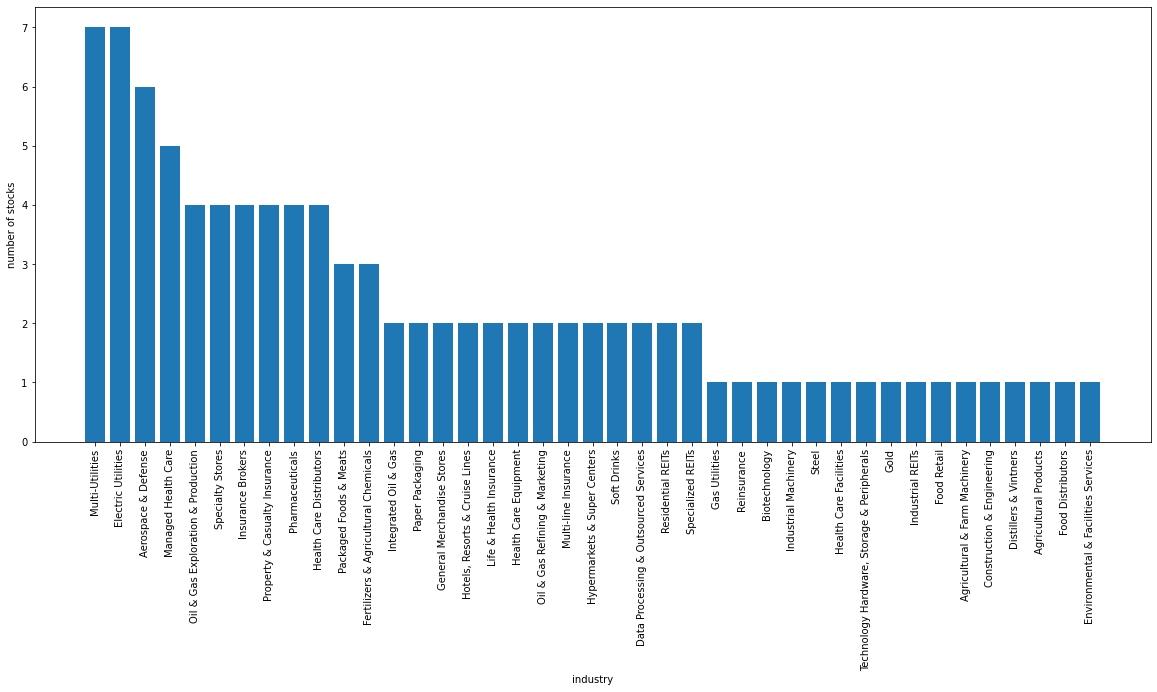

In [6]:
industry_value_counts = df[df["highest_day"] >= "2022-04-01"]["GICS Sub-Industry"].value_counts()
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(industry_value_counts.index, industry_value_counts.values)
ax.set_xticklabels(industry_value_counts.index, rotation=90)
ax.set_xlabel("industry")
ax.set_ylabel("number of stocks")
plt.show()

In [7]:
industry_value_counts[industry_value_counts.index.str.contains("Oil & Gas")]

Oil & Gas Exploration & Production    4
Integrated Oil & Gas                  2
Oil & Gas Refining & Marketing        2
Name: GICS Sub-Industry, dtype: int64

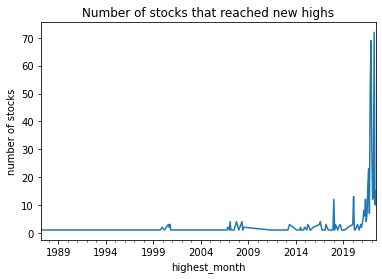

In [8]:
highest_day_count = df.groupby("highest_month").count()
highest_day_count["ticker"].plot()
plt.title("Number of stocks that reached new highs")
plt.ylabel("number of stocks")
plt.show()

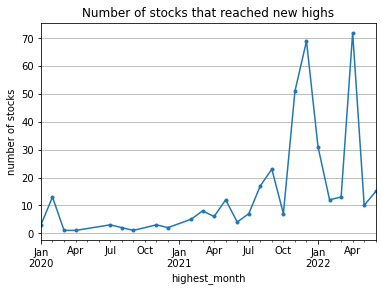

In [9]:
highest_day_count["ticker"].plot(marker=".")
plt.grid(axis='y')
plt.title("Number of stocks that reached new highs")
plt.xlim("2020-01-01", "2022-06-30")
plt.ylabel("number of stocks")
plt.show()

In [10]:
tikcer_list = ["GOOG", "AAPL", "FB", "AMZN", "MSFT", "TSLA", "NVDA"]
df[df["ticker"].isin(tikcer_list)]

,highest_day,ticker,highest_price,highest_month,Symbol,GICS Sector,GICS Sub-Industry
132,2021-07-08,AMZN,186.570496,2021-07,AMZN,Consumer Discretionary,Internet & Direct Marketing Retail
174,2021-11-19,MSFT,343.109985,2021-11,MSFT,Information Technology,Systems Software
215,2021-11-29,NVDA,333.760010,2021-11,NVDA,Information Technology,Semiconductors
335,2021-11-04,TSLA,1229.910034,2021-11,TSLA,Consumer Discretionary,Automobile Manufacturers
376,2021-11-18,GOOG,3014.179932,2021-11,GOOG,Communication Services,Interactive Media & Services
449,2022-01-03,AAPL,182.009995,2022-01,AAPL,Information Technology,"Technology Hardware, Storage & Peripherals"


/var/folders/3p/kbq4x58n37d9f5qsg3mc44qm0000gn/T/ipykernel_76807/2405788357.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(industry_value_counts.index, rotation=90)


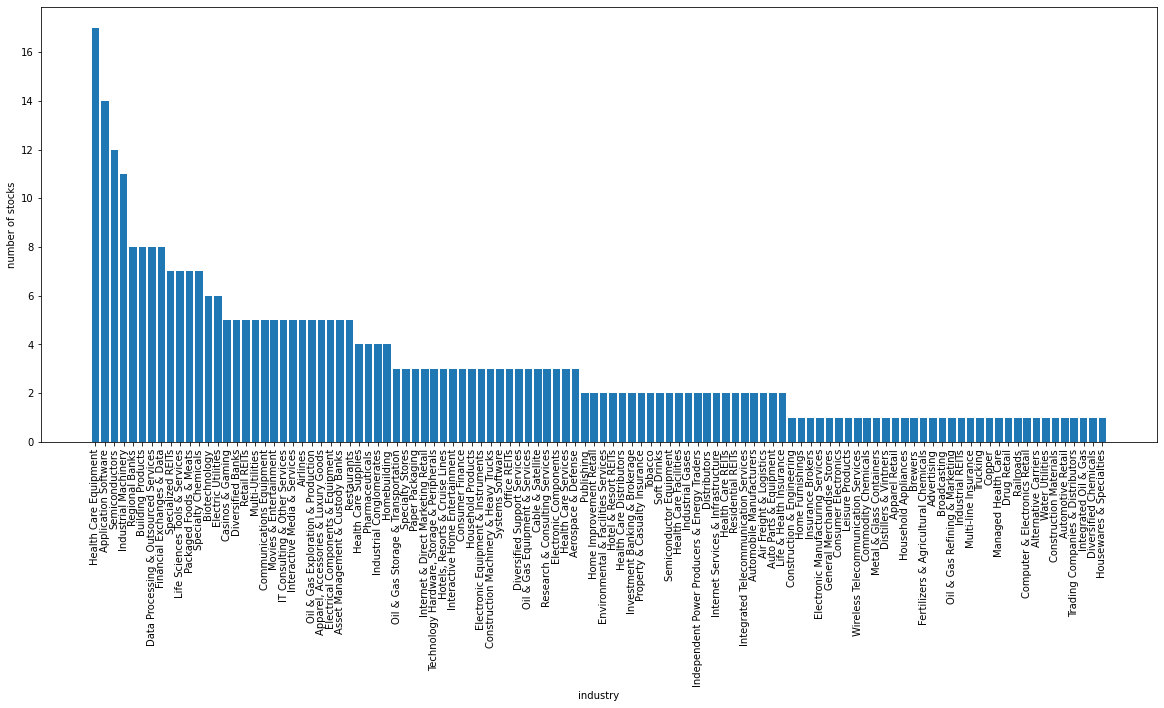

In [11]:
industry_value_counts = df[df["highest_day"] <= "2021-12-31"]["GICS Sub-Industry"].value_counts()
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(industry_value_counts.index, industry_value_counts.values)
ax.set_xticklabels(industry_value_counts.index, rotation=90)
ax.set_xlabel("industry")
ax.set_ylabel("number of stocks")
plt.show()

In [12]:
df["in_2022"] = df["highest_day"].map(lambda x: False if x.year < 2022 else True)
value_counts_before_2022 = df[df["in_2022"] == False]["GICS Sub-Industry"].value_counts()
value_counts_2022 = df[df["in_2022"] == True]["GICS Sub-Industry"].value_counts()
value_counts_before_2022.name = "~2021"
value_counts_2022.name = "2022"
comparison_df = pd.concat([value_counts_2022, value_counts_before_2022], axis=1)
comparison_df = comparison_df.fillna(0)
comparison_df.head()

,2022,~2021
Aerospace & Defense,8.0,3.0
Multi-Utilities,7.0,5.0
Electric Utilities,7.0,6.0
Property & Casualty Insurance,6.0,2.0
Managed Health Care,5.0,1.0


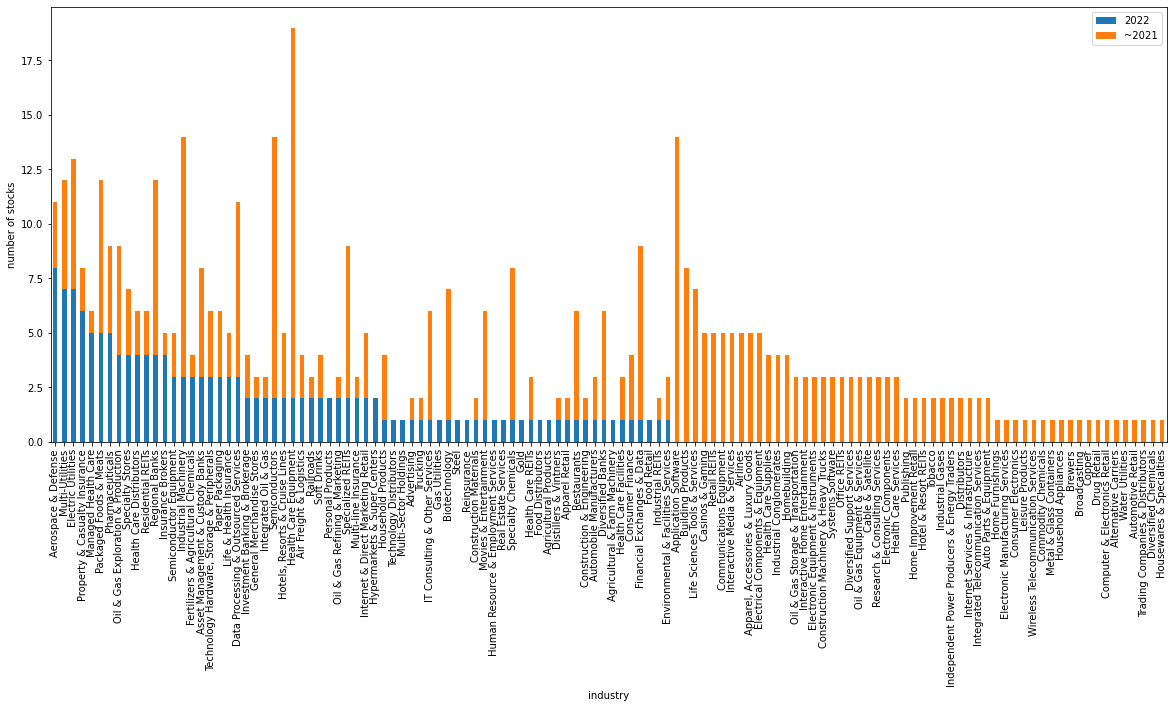

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))
comparison_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel("industry")
ax.set_ylabel("number of stocks")
plt.show()